**第4章: 形態素解析**\
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [ ]:
!pip install mecab-python3

#辞書インストール
!pip install unidic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7425 sha256=8cab6d6c5cebc1a9917973f5cd8c08f1cab205d22a56f8673958a2b65f88c01e
  Stored in directory: /root/.cache/pip/wheels/22/bc/bb/46aba36d0388f67dfe44bb0edc20a2c964560d4d19ec394e05
Successfully built unidic


In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2022-12-08 11:51:29--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2022-12-08 11:51:30 (19.8 MB/s) - ‘neko.txt’ saved [975789/975789]



In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 11 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ub

In [ ]:
!mecab -o ./neko.txt.mecab ./neko.txt

**30. 形態素解析結果の読み込み**\
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ

In [ ]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
  for line in f:  # 1行ずつ読込
    if line != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
      fields = line.split('\t')
      if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
        continue
      else:
        attr =  fields[1].split(',')
        morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
        morphs.append(morph)
    else:  # 文末：形態素リストを文リストに追加
      sentences.append(morphs)
      morphs = []

for morph in sentences[5]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'か', 'base': 'か', 'pos': '助詞', 'pos1': '副助詞／並立助詞／終助詞'}
{'surface': 'とんと', 'base': 'とんと', 'pos': '副詞', 'pos1': '一般'}
{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': 'が', 'base': 'が', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'ぬ', 'base': 'ぬ', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


**31. 動詞**\
動詞の表層形をすべて抽出せよ．

In [ ]:
ans31 = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans31.add(morph['surface']) 

print(ans31)


{'しかっ', '損ね', '見立て', '下げる', '欠け', '残し', '鳴る', '置か', '落ちつか', '当ら', '仕入れ', '背負っ', '片付く', 'かけ', '逢える', '及ぼし', '企て', '見て取っ', 'つかえる', '儲ける', '縊れる', '関する', '足そ', '掛る', '古る', '遠のい', '勤め', '落つ', 'き', '片づけ', '見せよ', '勝と', '鳴い', 'れん', '取り払っ', '果さ', '書き', '隣り', '押し出す', 'わす', 'もし', 'めで', '敬す', '揉ま', '留ら', '移す', 'もがけ', 'くるみ', '叫び', '集まっ', '上げる', '拾わ', '沈ん', '吹き込ん', '改める', '続ける', '足る', '押し込む', 'はれ', '帰れ', '申し込ま', 'ねじ伏せる', 'かか', '律すれ', '張る', '睨みつける', '逢え', '進も', '食う', '持ち出し', '召し上がれ', '吹き出す', '応じ', 'からまっ', '来れ', '済ます', 'そそのかし', '引き返し', 'たどっ', '優る', '傭っ', '間に合わ', '生れれ', 'ござる', '薫ずる', '取り違える', '異なる', '浮き', '承っ', '増し', 'かかわる', '馴らし', '抱く', 'とまり', '留まる', '湧い', '済まし', 'どき', 'かかえ', '勝つ', '召し', '好み', '懸かり', 'ふれ', '見識張っ', '揉ん', '外れ', '講ずる', '生き', '張り付け', '破る', '役に立つ', '遊ぶ', '授ける', '撚り', '聞え', '挟ん', '渡す', '洩', '待ち合せ', '換える', '投げ', '燃える', 'なくなっ', '描き出さ', '滅す', '踊ら', '乗せ', '描き', 'いる', '読み出す', '調子づい', '引き裂い', '曝し', 'ふかし', '償わ', '取り寄せ', '引き続い', '作ろ', '溯っ', '褒める', 'すう', '乗じ', '下っ', 'いよ', '見計らっ', '伺っ', '通り抜け', 'た', 

**32. 動詞の基本形**\
動詞の基本形をすべて抽出せよ．



In [ ]:
ans32 = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans32.add(morph['base'])

print(ans32) 

{'おいたつ', 'おれる', 'もがく', '下げる', '誓う', '鳴る', '括る', 'あいかわる', '片付く', '逢える', '慮る', '待ちかねる', 'つかえる', '儲ける', '縊れる', 'すくむ', '開き直る', '関する', '自惚れる', '沈める', '掛る', '古る', 'まかり間違う', '知らす', '積み込む', '出張る', '落つ', '据え付ける', '交わす', '聞かす', '間違う', '待ち受ける', '片づく', '見縊る', '押し出す', 'はなつ', '移す', '仰せつける', '接す', '磨ける', 'すれる', 'さておく', '於く', '上げる', '咽ぶ', '取り囲む', '供する', 'ひるむ', '続ける', '足る', '改める', '押し込む', 'いいかえる', '寝そべる', 'ねじ伏せる', '静まり返る', '張る', '睨みつける', '食う', '吹き出す', '醒める', '見当る', '済ます', 'ござる', '優る', '横切る', '薫ずる', '囃す', '取り違える', '異なる', 'かかわる', '刺す', '抱く', 'はみ出す', 'きめる', 'はねる', '留まる', 'さばける', '勝つ', 'ふく', '分つ', 'とりのける', '講ずる', '破る', '役に立つ', '遊ぶ', '授ける', '罷る', '渡す', '換える', '燃える', 'いる', '読み出す', 'しきる', '褒める', 'すう', '生す', '察す', '御する', '劣る', 'ととのう', '侵す', 'どる', '利く', '干る', '躍る', '奪う', '貫く', '考える', '裂く', 'つくろう', 'しる', '切り抜ける', '怠る', '頑張る', '聞き返す', 'のさばる', '言い付ける', '逆立てる', '覚める', '差す', '成す', 'かさねる', '騒ぎ出す', '踏み出せる', '化す', '引き起す', '応ずる', '寝過ごす', 'ずれる', '悩む', 'たべる', '付ける', 'そらす', '織る', '丸める', '引き抜く', '焦る', 'かきつける', '作る', '置ける', 

**33. 「AのB」**\
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
ans33 = set()
for sentence in sentences:
  for i in range(1, len(sentence) - 1):
    if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
      ans33.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

print(ans33)

{'これらの条件', '三の条件', '冬の日脚', '最後の手段', '文明の人間', '驚愕の箍', '乱入の虞', '自国の我流', '唯一の楽', '二の機会', '下の事件', '初めの勢', '匹の肴', '将来の趨勢', '馬琴の胴', '眉の根', '君の受売', '御存じの方', '磁気の研究', '御国のため', '枝の上', '君の庚申山', '最後の方案', '鈴木の味', '金田の内幕', '眼前の習慣', '君の旧友', 'ほかの部分', '衛門の方', 'あすこの娘', '色のホヤ', '人間のひま', '池のまわり', '他の庭', '性の笑', '私の家', '沼の奥', '自分の方', '行李の中', '江の水', '鍔のよう', '辻の真中', '垣の隙', '先生の頭', '垂れの上', '効の度', '敵の陣', 'とくの昔', '彼等のうち', '柔術のよう', '不可思議の太平', '悲壮の音', '平凡の堂', '松樹の巓', 'トチメンボーの御馳走', '馬琴の小説', '子の身代り', '女学校の生徒', '主人の代理', '吾輩の罪', '前の奴', '君の説', '家の話', '法外の胴間声', '自己の面目', '板の木目', '呑舟の魚', '東風の勝手', '形体の上', '吾輩の矮小', '裸体の美人', '味噌の学校', '相当の時間', '座の裏', '迷亭の食い気', '警察の逆上', '一道の電気', '向うの下宿', '主人の論理', '同様の速度', '三平の山の芋', 'ベースボールの何', '承知の上', '俺のジャム', '私のよう', '上の言語', '舶来の膏薬', '世紀の頃', '腹の上', '方寸のうち', '液体の事', '文明のため', '猫の企て', '這裡の消息', '東の離れ', '渋柿の皮', '抜の骨頂', '笹の葉', '一の真理', '自分の勢力', '雲母のよう', '例の神経', '月形の欠け目', '貝の所在地', 'だらけの英文', '輪のくせ', '君のヴァイオリン', '満腔の熱誠', '演習のため', '子の先刻', '大和魂の演説', '三角の中心', '迷亭の専断', '特別の異状', '会の演説', '地上の者', '近頃の如く', '大

**34. 名詞の連接**\
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
ans34 = set()
for sentence in sentences:
  nouns = ''
  num = 0
  for morph in sentence:
    if morph['pos'] == '名詞':  # 最初の形態素から順に、名詞であればnounsに連結し、連結数(num)をカウント
      nouns = ''.join([nouns, morph['surface']])
      num += 1
    elif num >= 2:  # 名詞以外、かつここまでの連結数が2以上の場合は出力し、nounsとnumを初期化
      ans34.add(nouns)
      nouns = ''
      num = 0
    else:  # それ以外の場合、nounsとnumを初期化
      nouns = ''
      num = 0
  if num >= 2: 
    ans34.add(nouns)

print(ans34)

{'心的変化', '田舎もの', '始め病気', '一番遠慮', '一番先', '利己主義', '礼義', '吐出致候', 'あなた大変色', '二三日前年始', '松薪', '言葉寡なに上品', '十八九', '日本堤界隈', '艶書事件', '唐詩選', '各自任意', 'のだい', '万葉調', '朝鮮仁参', '今朝雑煮', '警視庁刑事巡査吉田虎蔵', '貧時', '十年振り', '幸誰', 'そりゃ訳', '否や催促', '二度三度', '伝声', '夫婦連', '寄り合', '盗難告訴', '成下度', '二三梃いっしょ', '和唐内', '先生一', '原理原則', '驚ろか', '上等品', '猫鍋', 'さっき湯', '羅甸語', '煙草入', '賓頭顱', '評判記', '通行上', '間我慢', '一室内', 'みんな自力', '青軸', '我々朋友たる者', '時鈴木君', '貴婦人方', '鉄気', '五寸近く', '意気込', '一番安心', '二八', '正科', '二階作り', '毎日書斎', '結果不自由', '勢揃', '二十二巻目', '六百円', 'たんだい', 'せんだって僕', '材料払底', '巻煙草入', '夏さん', '上田敏君', '蝉取り運動上', '洪量', '芸術家', '出来損', '姥子', 'ざる事', '問屋たる', 'もの主人', '書生時代', '以来今日', '良薬口', '御礼旁', 'ぐにゃりと前', '理科大学', '一ぷくふかしているとようやく甘木先生', '是非伺', '十二月四日', '小判形', '臭骸', '恃むもの', '博士夫人', '左向', '当人自身', '時電光影裏', '超絶的曲線', '険呑', '旦那女の子', '浮華虚栄', '時蟷螂君', '子規さん', '伯父さん', '庸人', '香裏', '人迹稀', '毎日毎日店頭', '朱盆', '馬鹿気', '上貧乏', '恃む', '帆木綿', 'その後東京', '演舌家', '晩書斎', '居住地以外', '実用上', '灰吹きが', '橡面坊', 'その後一戸', '一体車屋', '顔面的条件', '四五丁', '——面倒', '退屈様', '袴期', '懸賞的興奮剤', 'これぎりご免', 'おやじさん

**35. 単語の出現頻度**\
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

defaultdict:存在しないkeyに対し0で初期化をする。

sort():元のリストを破壊的にソートする。\
sorted():ソートした新たなリストを生成。\
reverse = Trueで降順。デフォルトは昇順。


In [ ]:
from collections import defaultdict 

ans35 = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans35[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans35 = sorted(ans35.items(), key=lambda x: x[1], reverse=True) #x[1]　数字でソート

# 確認
#for w in ans[:10]:
#  print(w)

ans35[0][0]

'の'

**36. 頻度上位10語**\
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

Matplotlib一覧\
plt.plot()	折れ線グラフ\
plt.scatter()	散布図\
plt.bar()	縦棒グラフ\
plt.barh()	横棒グラフ\
plt.hist()	ヒストグラム\
plt.boxplot()	ボックスプロット\
plt.violinplot()	バイオリンプロット\
plt.contour()	コンタープロット\
plt.pcolor()	擬似カラープロット(ヒートマップ)\
plt.imshow()	画像\
plt.axhline()	水平線\
plt.axvline()	垂直線

plt.set_title()	タイトルを設定\
plt.set_xlabel()	x軸の名前を設定\
plt.set_ylabel()	y軸の名前を設定\
plt.set_xlim()	x軸の範囲を指定\
plt.set_ylim()	y軸の範囲を指定\
plt.legend()	凡例を表示\
plt.grid()	グリッド線を表示

In [ ]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=863141d91b7d1ad3829414eadb73927610b49c78414b65c27f182401f3610ad5
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


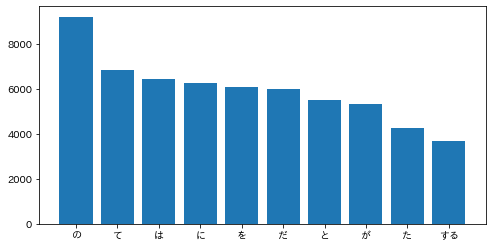

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib


ans36 = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans36[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans36 = sorted(ans36.items(), key=lambda x: x[1], reverse=True)

keys=[]
values=[]
for i in range(10):
  keys.append(ans36[i][0])
  values.append(ans36[i][1])

plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

**37. 「猫」と共起頻度の高い上位10語**\
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

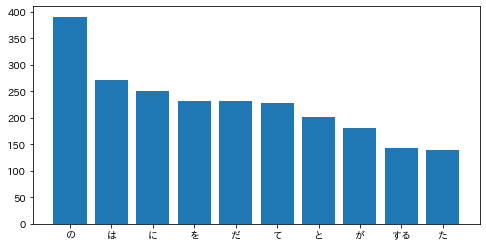

In [ ]:
ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['surface'] for morph in sentence]:
    for morph in sentence:
      if morph['pos'] != '記号':
        ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

**38. ヒストグラム**\
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である

<function matplotlib.pyplot.show(*args, **kw)>

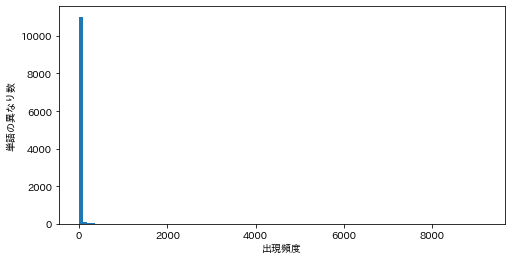

In [ ]:
ans38 = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans38[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans38 = ans38.values()

plt.figure(figsize=(8, 4))
plt.hist(ans38, bins = 100)
plt.xlabel("出現頻度")
plt.ylabel("単語の異なり数")
plt.show


**39. Zipfの法則**\
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

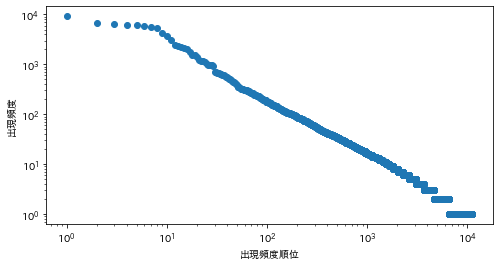

In [ ]:
import math

ans39 = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans39[morph['base']] += 1
ans39 = sorted(ans39.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans39))]
values = [a[1] for a in ans39]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()